In [1]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vijayvvenkitesh/microsoft-stock-time-series-analysis

Dataset URL: https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis
License(s): CC0-1.0
  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 49.7MB/s]


In [4]:
!unzip microsoft-stock-time-series-analysis.zip

Archive:  microsoft-stock-time-series-analysis.zip
  inflating: Microsoft_Stock.csv     


## IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data- preprocess

In [6]:
data = pd.read_csv("Microsoft_Stock.csv")

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [9]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [12]:
# date
data.Date = pd.to_datetime(data.Date)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [15]:
data.index = data.Date

In [16]:
data

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2015-04-01 16:00:00,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
2021-03-25 16:00:00,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [17]:
data.drop("Date", axis=1, inplace=True)

In [18]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [19]:
target = data.Close

In [20]:
len(target)

1511

In [21]:
type(target)

pandas.core.series.Series

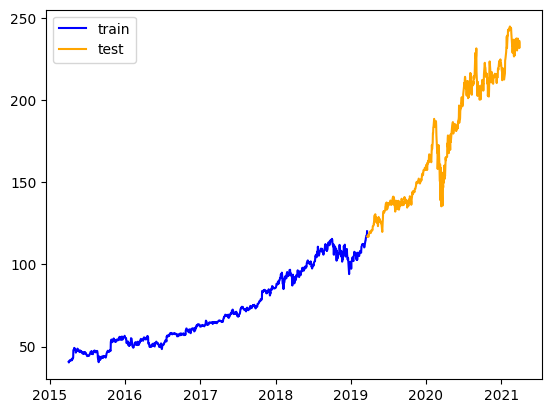

In [25]:
plt.plot(target[:1000], color="b", label="train")
plt.plot(target[1000:], color="orange", label="test")
plt.legend()

##Train and test

In [27]:
train_data = data.Close

In [39]:
# create dataset
def data_creation(dataframe: pd.Series, window_size=1):
  my_data = dataframe.to_numpy()

  X = []
  y = []

  for value in range(len(my_data)-1):
    row = [[x] for x in my_data[value:value+window_size]]
    col = my_data[value + window_size]

    X.append(row)
    y.append(col)

  return np.array(X), np.array(y)

In [40]:
X, y = data_creation(train_data)

In [41]:
X.shape

(1510, 1, 1)

In [42]:
y.shape

(1510,)

In [43]:
# ready to train
X_train, X_test = X[:1000], X[1000:]
y_train , y_test = y[:1000], y[1000:]

In [47]:
from keras.layers import *
from keras.models import Sequential
from keras.metrics import R2Score

In [53]:
model = Sequential()
model.add(InputLayer((1 , 1)))
model.add(LSTM(64, activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=[R2Score()])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 1, 64)             16896     
                                                                 
 dropout_12 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 54145 (211.50 KB)
Trainable params: 5414

In [56]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 13ms/step - loss: 608.9452 - r2_score: -0.2079 - val_loss: 627.5582 - val_r2_score: 0.5589
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 255.8762 - r2_score: 0.4924 - val_loss: 274.5174 - val_r2_score: 0.8071
Epoch 3/200
32/32 [==============================] - 0s 15ms/step - loss: 154.0657 - r2_score: 0.6944 - val_loss: 1170.7655 - val_r2_score: 0.1771
Epoch 4/200
32/32 [==============================] - 0s 11ms/step - loss: 109.6787 - r2_score: 0.7824 - val_loss: 862.3605 - val_r2_score: 0.3939
Epoch 5/200
32/32 [==============================] - 1s 27ms/step - loss: 84.2566 - r2_score: 0.8329 - val_loss: 1036.9893 - val_r2_score: 0.2712
Epoch 6/200
32/32 [==============================] - 1s 36ms/step - loss: 84.8532 - r2_score: 0.8317 - val_loss: 1227.3420 - val_r2_score: 0.1374
Epoch 7/200
32/32 [==============================] - 1s 17ms/step - loss: 78.1961 - r2_score: 0.8449 - val_loss: 1683.5852

16/16 [==============================] - 0s 3ms/step


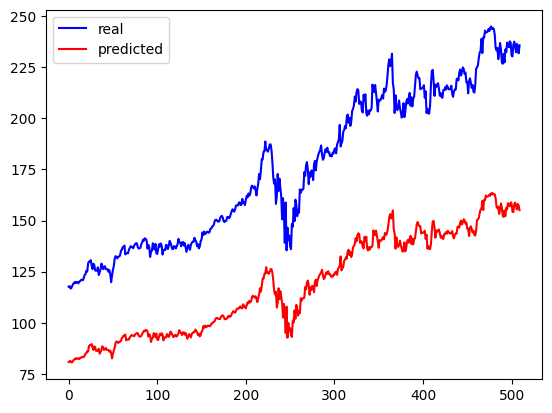

In [58]:
predicted = model.predict(X_test)
plt.plot(y_test, color="blue", label="real")
plt.plot(predicted, color="red", label="predicted")
plt.legend()